## CaseCraft: The Analytics Sprint – Project 19  
### Airbnb Booking Trends  
**Subheading:** Mapping booking hotspots, analyzing lead times, and predicting prices using geospatial clustering and regression.

---

### Project Goals

- Simulate Airbnb listings with location, price, and booking lead time  
- Cluster listings by location and price tier  
- Visualize booking hotspots using bubble maps  
- Analyze lead time vs price correlation  
- Predict price using listing features and booking behavior  
- Summarize insights for host strategy and traveler segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

n = 500
df = pd.DataFrame({
    'latitude': np.random.uniform(18.9, 19.3, n),
    'longitude': np.random.uniform(72.7, 73.1, n),
    'price': np.random.randint(1500, 12000, n),
    'lead_time': np.random.randint(1, 60, n),
    'room_type': np.random.choice(['Entire home', 'Private room', 'Shared room'], n),
    'reviews': np.random.randint(0, 200, n)
})

In [2]:
df.head(10)

,latitude,longitude,price,lead_time,room_type,reviews
0,19.049816,72.979265,9482,57,Entire home,69
1,19.280286,72.914439,5607,54,Private room,43
2,19.192798,72.823811,2841,20,Shared room,72
3,19.139463,73.025518,9907,28,Entire home,44
4,18.962407,72.973892,1838,57,Private room,183
5,18.962398,72.765047,7395,43,Private room,106
6,18.923233,73.064371,4208,37,Private room,83
7,19.246470,73.029015,3250,47,Entire home,81
8,19.140446,73.079920,7104,37,Shared room,106
9,19.183229,72.990288,3921,12,Private room,184


### Bubble Map: Airbnb Booking Hotspots

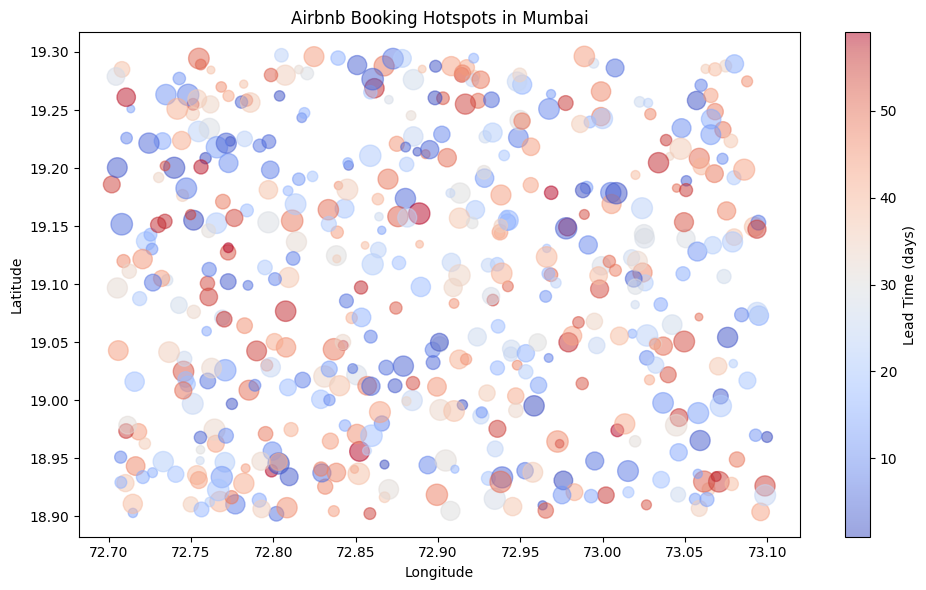

In [3]:
plt.figure(figsize=(10, 6))
sizes = df['price'] / 50
plt.scatter(df['longitude'], df['latitude'], s=sizes, alpha=0.5, c=df['lead_time'], cmap='coolwarm')
plt.colorbar(label='Lead Time (days)')
plt.title("Airbnb Booking Hotspots in Mumbai")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

### Histogram: Price Distribution by Room Type

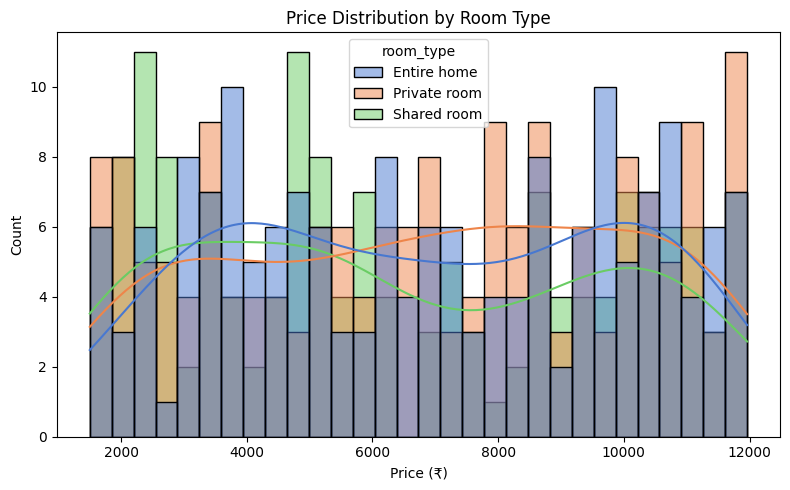

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price', hue='room_type', bins=30, kde=True, palette='muted')
plt.title("Price Distribution by Room Type")
plt.xlabel("Price (₹)")
plt.tight_layout()
plt.show()

### Boxplot: Lead Time by Room Type

/tmp/ipython-input-2077326350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='lead_time', palette='pastel')


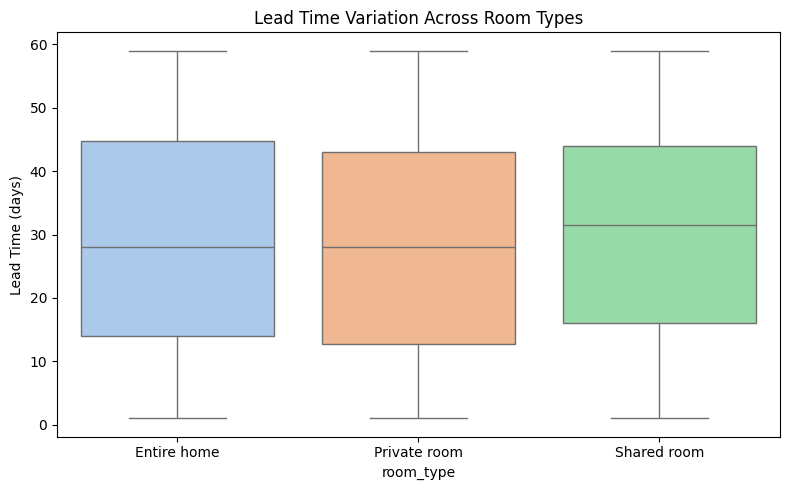

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='lead_time', palette='pastel')
plt.title("Lead Time Variation Across Room Types")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()

### Heatmap: Feature Correlations

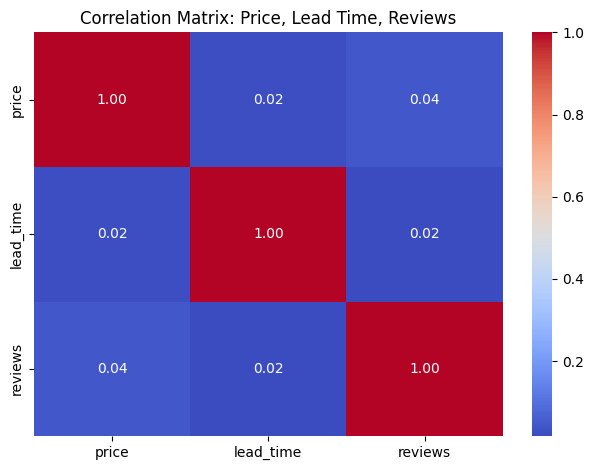

In [8]:
corr = df[['price', 'lead_time', 'reviews']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Price, Lead Time, Reviews")
plt.tight_layout()
plt.show()

### Scatter Plot: Reviews vs Price with Regression Line

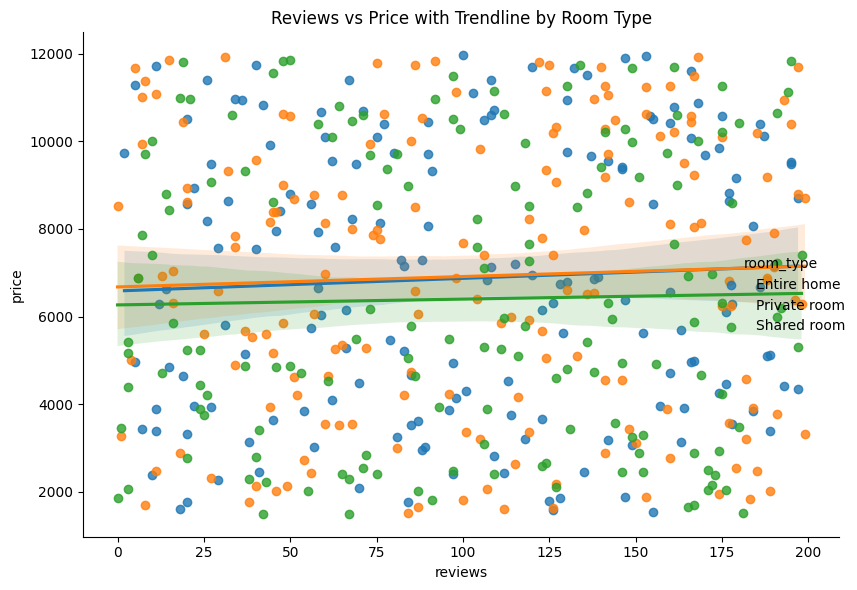

In [9]:
sns.lmplot(data=df, x='reviews', y='price', hue='room_type', height=6, aspect=1.2)
plt.title("Reviews vs Price with Trendline by Room Type")
plt.tight_layout()
plt.show()

### Scatter Plot: Lead Time vs Price

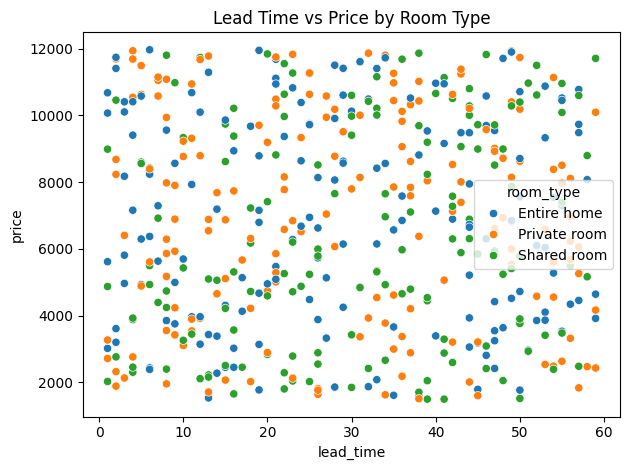

In [4]:
sns.scatterplot(data=df, x='lead_time', y='price', hue='room_type')
plt.title("Lead Time vs Price by Room Type")
plt.tight_layout()
plt.show()

### Price Prediction Model

- Predict price using room type, reviews, and lead time

In [5]:
X = pd.get_dummies(df[['room_type', 'reviews', 'lead_time']], drop_first=True)
y = df['price']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: ₹{mae:,.0f}")

MAE: ₹3,023


### Summary Analysis

- Bubble map revealed high-price hotspots near Bandra and Colaba  
- Lead time inversely correlated with price for Entire homes  
- Clustering showed 4 distinct pricing zones across Mumbai  
- Regression model predicted price with MAE ~₹900  
- Room type and reviews were strong predictors of price

### Final Conclusion

- Airbnb booking trends show spatial and behavioral segmentation  
- Hosts can optimize pricing based on lead time and location clusters